In [136]:
!pip install matplotlib
!pip install seaborn

     ------------------------------------ 292.8/292.8 KB 951.4 kB/s eta 0:00:00
     ---------------------------------------- 10.6/10.6 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 37.0/37.0 MB 2.5 MB/s eta 0:00:00


In [137]:
import numpy as np
import matplotlib as plt
import math as mt
import seaborn as sb
import pandas as pd

%matplotlib inline

In [196]:
class prognoz:
    ''' 
    
        '''
    value = 0 
    
    def __init__(self, array_x, array_y):
        self.array_x = array_x
        self.array_y = array_y
    
    def sum_x(self):
        return(sum(self.array_x))
        
    def sum_y(self):
        return(sum(self.array_y[i] for i in range(len(self.array_y))))

    def square_x(self):
        return(sum(self.array_x[i]**2 for i in range(len(self.array_x))))
        
    def sum_xy(self):
        return(sum([self.array_x[i] * self.array_y[i] for i in range(len(self.array_x))]))
    
    def var_a(self):
        return((len(self.array_x)*prognoz.sum_xy(self) - prognoz.sum_x(self) * prognoz.sum_y(self))/
        (len(self.array_x)*prognoz.square_x(self) - (prognoz.sum_x(self)**2)))
    
    def var_b(self):
        return((prognoz.sum_y(self)-prognoz.var_a(self)*prognoz.sum_x(self)) / (len(self.array_x)))
    
    def array_f(self):
        return([prognoz.var_a(self)*self.array_x[i] + prognoz.var_b(self) 
                for i in range(len(self.array_x))])
    
    def approx_func(self):
        a = [prognoz.array_f(self)[i] - (prognoz.var_a(self)*self.array_x[i]+ prognoz.var_b(self)) 
                                         for i in range(len(prognoz.array_f(self)))]
        return([a[i]**2 for i in range(len(a))]) 
    
    def draw_board(self):
        
        list_xy = {
            'x': self.array_x,
            'y': self.array_y
        }
        
        list_xf = {
            'x': self.array_x,
            'f': prognoz.array_f(self)
        }
        
        
        df_xy = pd.DataFrame(list_xy)
        
        df_xf = pd.DataFrame(list_xf)
        print(df_xy)
        print(df_xf)
        sb.scatterplot(data = df_xy, x='x', y='y')
        sb.lineplot(data = df_xf, x='x', y='f')
        

229 346 14587 21801
2.6677564165121455
1.4526690738752805
[18.64711622914023, 40.437152337269445, 65.13252659314921, 81.1118864057773, 140.6713184346638]
[0.0, 0.0, 0.0, 0.0, 0.0]
    x    y
0  11   13
1  26   35
2  43   65
3  54  102
4  95  131
    x           f
0  11   18.647116
1  26   40.437152
2  43   65.132527
3  54   81.111886
4  95  140.671318


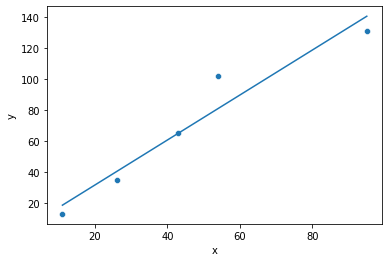

In [197]:
prog = prognoz([11,26,43,54,95], [13,35,65,102,131])
print(prog.sum_x(),
prog.sum_y(),
prog.square_x(),
prog.sum_xy())
print(prog.var_b())
print(prog.var_a())
print(prog.array_f())
print(prog.approx_func())
prog.draw_board()